# Introducción a la Ciencia de Datos

## 1. Qué es la Ciencia de Datos

> Por un largo tiempo pensé que era un estadístico interesado en las inferencias de lo particular a lo general. Pero según he visto la estadística matemática evolucionar, he tenido motivo para reflexionar y dudar... En resumidas cuentas he llegado a sentir que mi interés central está en el **análisis de datos**, que en mi entendimiento incluye, entre otras cosas: procedimientos para analizar datos, técnicas para interpretar los resultados de dichos procedimientos, maneras de planificar la recolección de datos para que su análisis sea más fácil, preciso o exacto, y toda la maquinaria y resultados de la estadística (matemática) que aplica para el análisis de datos.
> <div align="right">(John W. Tukey - 1962)</div>

### Como combinación de aptitudes
- **Estadística** Para analizar y explorar conjuntos de datos, visualizarlos, y probar hipótesis en ellos. 
- **Programación** Para el diseño y análsis de algoritmos que escalen bien con la cantidad de datos; extracción procesamiento automático de datos; técnicas de aprendizaje automático.
- **Conocimiento de dominio** De la ciencia o negocio en donde se trate de aplicar la ciencia de datos provienen los retos que hay que enfrentar así como los métodos para evaluar el éxito sobre estos mismos.
- **Comunicación** Para entender los problemas de dominio y presentar resultados de forma efectiva.

### Como paradigma científico
- **Ciencia experimental** Basada en el razonamiento inductivo; se registran y varían las condiciones en las que ocurre un fenómeno para su posible reproducción.
- **Ciencia teórica** Basada en el razonamiento deductivo; se proponen modelos matemáticos (ecuaciones elegantes) que permiten explicar o predecir fenómenos.
- **Ciencia computacional** Se realizan simulaciones computarizadas de los fenómenos para tratar de entenderlos y hacer predicciones sobre ellos. Estas simulaciones están basadas en modelos matemáticos o computacionales (programas con reglas simples).
- **Ciencia basada en datos** Se hace un uso intensivo de los datos para crear sistemas de predicción efectivos aunque posiblemente carentes de interpretación. En esencia, los modelos son los conjuntos de datos en sí mismos.

## 2. Taxonomía de datos

### Escalas de medición

Escala       |Qué mide                |Operaciones                |Ejemplos 
------------:|------------------------|---------------------------|--------
**Nominal**  |Clasificación, membresía|$=$, $\ne$, agrupar, contar|Colores, especies
**Ordinal**  |Comparación, nivel      |$<$, $>$, ordenar          |Grado de estudios, niv. socioeconómico
**Intervalo**|Diferencia, afinidad    |$+$, $-$, promedio         |Fechas, temperatura (°C)
**Razón**    |Magnitud, cantidad      |$\times$, $\div$           |Distancia, masa, duración, ángulo, temperatura (°K)

- Los datos booleanos (Sí/No) son usualmente considerados nominales.
- Una famosa escala ordinal es la **escala de Likert**, usada comunmente en encuestas:
    - *Totalmente en desacuerdo*
    - *En desacuerdo*
    - *Ni de acuerdo ni en desacuerdo*
    - *De acuerdo*
    - *Totalmente de acuerdo*
- Las escalas de razón se denominan así porque existe un punto de referencia absoluto (el cero) de manera que cualesquiera dos datos en esta escala se pueden expresar como *razón* la una de la otra.

### Modelo de datos
- Los **datos estructurados** son aquellos que están organizados en tablas, como los que se suelen encontrar en bases de datos relacionales y hojas de cálculo.
- Los **datos semiestructurados** no se pueden organizar en tablas pero sí preservan una estructura semántica; por ejemplo, las páginas web están escritas en HTML, con marcas que identifican listas, tablas, títulos, etc.
- Los **datos sin estructura** no poseen información semántica; ejemplos: imágenes, sonidos, videos, y texto plano

## 3. Representación de tablas en Python

En la práctica los datos estructurados se organizan en tablas donde cada renglón representa una **observación** y cada columna una **variable**. Ejemplo:

|Nombre |Fecha     |Peso (kg)|Score    |Color|
|-------|----------|---------|---------|-----|
|Adrián |2018-09-27|30       |Pasivo   |Azul |
|Beatriz|2013-03-17|40       |Promotor |Rojo |
|Carlos |NA        |83       |Detractor|Verde|
|Daniela|2014-12-25|29       |Pasivo   |Café |
|Ernesto|2090-01-01|50       |NA       |Negro|

En el contexto de las bases de datos a las observaciones se les llama **registros** y a las variables **campos**. Para su representación en Python, una tabla se puede entender como una colección de renglones o columnas.

### Representación por renglones

In [1]:
import datetime
import collections
import math
import random
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import networkx as nx
from scipy import stats
from scipy import special
import pathlib
import numba
from sklearn import datasets
from bokeh.plotting import figure, show, output_file
from bokeh.transform import factor_cmap, factor_mark
from bokeh.transform import linear_cmap
from bokeh.palettes import Category20c
from bokeh.transform import cumsum
from bokeh.palettes import Spectral6
from random import choice
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
fecha = datetime.datetime.fromisoformat
# Crear una tabla
tabla_renglones = [
    ('Adrián', fecha('2018-09-27'), 30, 'Pasivo', 'Azul' ),
    ('Beatriz', fecha('2013-03-17'), 40, 'Promotor', 'Rojo'),
    ('Carlos', None, 83, 'Detractor', 'Verde'),
    ('Daniela', fecha('2014-12-25'), 29, 'Pasivo', 'Café'),
    ('Ernesto', fecha('2090-01-01'), 50, None, 'Negro'),
]

In [3]:
# Buscar un registro particular:
for registro in tabla_renglones:
    if registro[0] == 'Carlos':
        break
else:
    raise KeyError('Registro no encontrado')

columnas = ['Nombre', 'Fecha', 'Peso (kg)', 'Score', 'Color']
for col, val in zip(columnas, registro):
    print(f'{col}: {str(val)}')

Nombre: Carlos
Fecha: None
Peso (kg): 83
Score: Detractor
Color: Verde


### Representación por columnas
La representación como colección de columnas es mejor si pretendemos hacer análsis sobre las mismas, como calcular promedios, graficar distribuciones, etc.

In [4]:
# Crear la tabla
tabla_columnas = {
    'Nombre': ['Adrián', 'Beatriz', 'Carlos', 'Daniela', 'Ernesto'],
    'Fecha': [fecha('2018-09-27'), fecha('2013-03-17'),
              None, fecha('2014-12-25'), fecha('2090-01-01')],
    'Peso (kg)': [30, 40, 83, 29, 50],
    'Promotor': ['Pasivo', 'Promotor', 'Detractor', 'Pasigo', None],
    'Color': ['Azul', 'Rojo', 'Verde', 'Café', 'Negro']
}

In [5]:
tabla_columnas

{'Nombre': ['Adrián', 'Beatriz', 'Carlos', 'Daniela', 'Ernesto'],
 'Fecha': [datetime.datetime(2018, 9, 27, 0, 0),
  datetime.datetime(2013, 3, 17, 0, 0),
  None,
  datetime.datetime(2014, 12, 25, 0, 0),
  datetime.datetime(2090, 1, 1, 0, 0)],
 'Peso (kg)': [30, 40, 83, 29, 50],
 'Promotor': ['Pasivo', 'Promotor', 'Detractor', 'Pasigo', None],
 'Color': ['Azul', 'Rojo', 'Verde', 'Café', 'Negro']}

In [6]:
# Analizar la columna Peso (kg)
columna = tabla_columnas['Peso (kg)']
print('Registros:', len(columna))
print('Peso mínimo:', min(columna))
print('Peso promedio:', sum(columna)/len(columna))
print('Peso máximo:', max(columna))

Registros: 5
Peso mínimo: 29
Peso promedio: 46.4
Peso máximo: 83


### Uso de pandas
La biblioteca [pandas][1] está dedicada al análisis de datos en Python, y su característica fundamental es que provee una estructura de datos, llamada *DataFrame*, para representar tablas de forma eficiente y permite hacer operaciones avanzadas con ellas.

[1]:https://pandas.pydata.org/

In [7]:
# Mandamos la representación por columnas al método constructor
tabla = pd.DataFrame(tabla_columnas)
tabla

,Nombre,Fecha,Peso (kg),Promotor,Color
0,Adrián,2018-09-27,30,Pasivo,Azul
1,Beatriz,2013-03-17,40,Promotor,Rojo
2,Carlos,NaT,83,Detractor,Verde
3,Daniela,2014-12-25,29,Pasigo,Café
4,Ernesto,2090-01-01,50,None,Negro


In [8]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
Nombre       5 non-null object
Fecha        4 non-null datetime64[ns]
Peso (kg)    5 non-null int64
Promotor     4 non-null object
Color        5 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 280.0+ bytes


In [9]:
tabla['Color'] = tabla['Color'].astype('category')

In [10]:
tabla['Fecha'] = pd.to_datetime(tabla['Fecha'])

In [11]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
Nombre       5 non-null object
Fecha        4 non-null datetime64[ns]
Peso (kg)    5 non-null int64
Promotor     4 non-null object
Color        5 non-null category
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 445.0+ bytes


In [12]:
tabla.loc[2]

Nombre          Carlos
Fecha              NaT
Peso (kg)           83
Promotor     Detractor
Color            Verde
Name: 2, dtype: object

In [13]:
seleccion = (tabla['Nombre'] == 'Carlos')
tabla[seleccion]

,Nombre,Fecha,Peso (kg),Promotor,Color
2,Carlos,NaT,83,Detractor,Verde


In [14]:
tabla['Peso (kg)'].describe()

count     5.000000
mean     46.400000
std      22.165288
min      29.000000
25%      30.000000
50%      40.000000
75%      50.000000
max      83.000000
Name: Peso (kg), dtype: float64

In [15]:
# Seleccionar columnas
tabla[['Nombre', 'Fecha']]

,Nombre,Fecha
0,Adrián,2018-09-27
1,Beatriz,2013-03-17
2,Carlos,NaT
3,Daniela,2014-12-25
4,Ernesto,2090-01-01


In [16]:
# Seleccionar renglones
seleccion = (tabla['Peso (kg)'] < 50)
tabla[seleccion]

,Nombre,Fecha,Peso (kg),Promotor,Color
0,Adrián,2018-09-27,30,Pasivo,Azul
1,Beatriz,2013-03-17,40,Promotor,Rojo
3,Daniela,2014-12-25,29,Pasigo,Café


In [17]:
# Combinación de condicionales con operadores booleanos
tabla[~(tabla['Peso (kg)'] < 50) | (tabla['Promotor'] == 'Promotor')]

,Nombre,Fecha,Peso (kg),Promotor,Color
1,Beatriz,2013-03-17,40,Promotor,Rojo
2,Carlos,NaT,83,Detractor,Verde
4,Ernesto,2090-01-01,50,None,Negro


In [18]:
# Procesamiento de columnas
tabla['Peso (lb)'] = tabla['Peso (kg)']*2.20462
tabla

,Nombre,Fecha,Peso (kg),Promotor,Color,Peso (lb)
0,Adrián,2018-09-27,30,Pasivo,Azul,66.13860
1,Beatriz,2013-03-17,40,Promotor,Rojo,88.18480
2,Carlos,NaT,83,Detractor,Verde,182.98346
3,Daniela,2014-12-25,29,Pasigo,Café,63.93398
4,Ernesto,2090-01-01,50,None,Negro,110.23100


In [19]:
?pd.DataFrame

Init signature: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
Docstring:     
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects

    .. versionchanged :: 0.23.0
       If data is a dict, argument order is maintained for Python 3.6
       and later.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided
columns : Index or array-like
    Column labels to use for resulting frame. Will default to
    RangeIndex (0, 1, 2, ..., n) if no column labels are provided
dtype : dt

# Estadística descriptiva

- Una **población** es la colección de *todos* los individuos que se desean estudiar.
- Un **censo** es la colección de datos de *cada* miembro de la población.
- Una **muestra** es un subconjunto seleccionado de un censo.
- Un **parámetro** es un valor numérico que describe alguna característica de la población.
- Una **estadística** es un valor numérico que describe alguna característica de una muestra.

La **estadística descriptiva** concierne a la manera de describir un conjunto de datos. Esencialmente nos interesan tres aspectos:
- Medir la **tendencia central** de los datos para poder describir cómo se ve más o menos un valor típico.
- Medir la **dispersión** al rededor de la tendencia central para saber qué tanto nos podemos alejar de un valor típico si elgimos uno al azar.
- Medir la **correlación** que existe entre dos variables de un mismo conjunto para saber qué tanto podemos explicar una en términos de la otra.

## 1. Medidas de tendencia central
La media de una población $X = (x_1, x_2, \ldots, x_n)$ se define por
$$X_\mu = \frac{\sum_{i=1}^{n} x_{i}}{n}$$

El estimador de la media para una muestra $x$ se define igual, pero se denota con una barra así: $\bar{x}$.
La diferencia entre la media de una población y una muestra la podemos entender mediante una simulación de ejemplo:

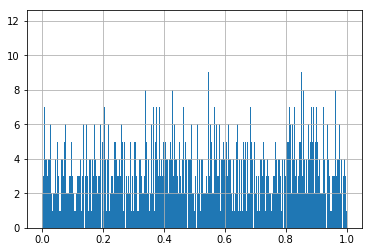

In [20]:
# Generamos una población alteatoria distribuida uniformemente:
N = 100_000
poblacion = pd.Series(np.random.random(size=N), name='valor')
# Para entender cómo se distribuyen los valos de esta población basta graficar un histograma:
poblacion.hist(bins=30000)

In [21]:
# Así se calcula la media de una serie de Pandas:
poblacion.mean()

0.5014573813506904

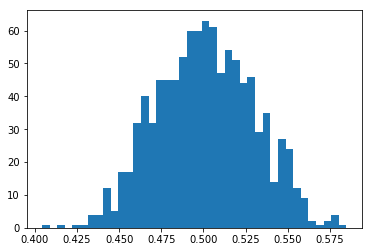

In [22]:
# Tomamos 1000 muestras de tamaño 100 de la población
muestras = [poblacion.sample(100) for i in range(1000)]

# A cada muestra le calculamos la media:
medias = [muestra.mean() for muestra in muestras]

# Graficamos la distribución de las medias de las muestras:
histograma = plt.hist(medias, bins=40)

Notamos que las medias muestrales se distribuyen al rededor de la media real.

Para usar la media hay que tener cuidado de los *valores atípicos*, ya que la media es muy sensible a ellos. Ejemplo:

In [23]:
N = 100000
poblacion = np.random.randint(0,1000,size=N)
poblacion

array([182, 625, 356, ..., 289, 218, 118])

In [24]:
print("La media de la poblacion es: ",np.mean(poblacion))

La media de la poblacion es:  500.0699


In [25]:
muestras = poblacion.reshape((1000,100))

In [26]:
l=[]
for muestra in muestras:
    l.append(np.mean(muestra))

In [27]:
medias_muestrales=np.mean(muestras,axis=1)
print(len(medias_muestrales))
#medias_muestrales

1000


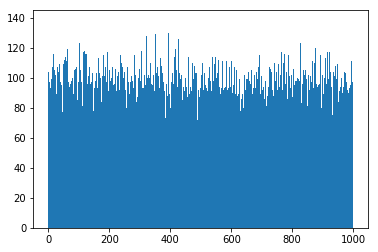

In [28]:
plt.hist(poblacion,bins=1000)
plt.show()

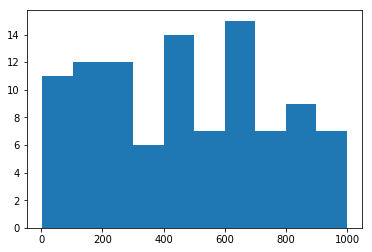

In [29]:
plt.hist(muestras[1])
plt.show()

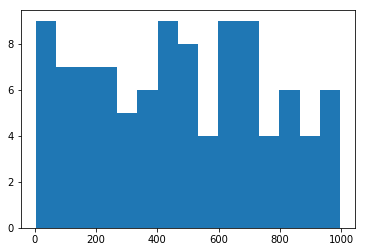

In [30]:
plt.hist(muestras[1],bins=15)
plt.show()

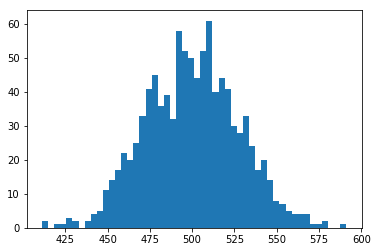

In [31]:
plt.hist(medias_muestrales,bins=50)
plt.show()

¡Oh! [El teorema del limite central](https://es.wikipedia.org/wiki/Teorema_del_l%C3%ADmite_central) ha aparecido

Para usar la media hay que tener cuidado de los *valores atípicos*, ya que la media es muy sensible a ellos. Ejemplo:

In [32]:
salarios = [14_000 , 20_000, 25_000, 35_000, 18_000]
np.mean(salarios)

22400.0

In [33]:
salarios.append(17_509_066_666)
np.mean(salarios)

2918196444.3333335

## La mediana, cuantiles, cuartiles y percentiles

## Mediana 
Es el valor que se encuentra justo a la mitad de nuestros datos cuando los ordenamos de menor a mayor. Si la cantidad de datos es par entonces tomamos el promedio entre los dos de la mitad.

In [34]:
salarios.sort()
salarios

[14000, 18000, 20000, 25000, 35000, 17509066666]

In [35]:
salarios[len(salarios)//2]

25000

In [36]:
np.median(salarios)

22500.0

Más en general, el **estadístico de orden kº** es igual al $k$-ésimo valor más pequeño de una muestra; es decir, el que aparece en la posición $k$ ordenamos la muestra de menor a mayor.
Esto nos restringe $k$ a $1 \le k \le n$ para una muestra de tamaño $n$. Un concepto similar es el percentil, que es un número tal que 

## La moda

Es el valor más común. Sólo sirve con variables categóricas. Mejor sacar una tabla de frecuencias

In [37]:
colores = np.random.choice(['Rojo', 'Verde', 'Azul'], size=1000)

In [38]:
cuenta = {}
for color in colores:
    if color not in cuenta.keys():
        cuenta[color] = 1
    else:
        cuenta[color]+=1

In [39]:
cuenta

{'Rojo': 319, 'Verde': 357, 'Azul': 324}

In [40]:
cuenta = collections.Counter(colores)
cuenta

Counter({'Rojo': 319, 'Verde': 357, 'Azul': 324})

## Comparación de las tres medidas

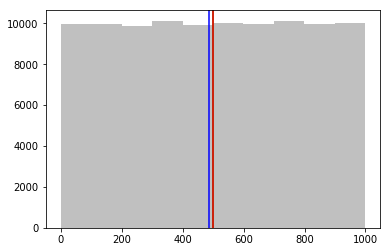

In [41]:
plt.hist(poblacion,color='silver')
plt.axvline(np.mean(poblacion),color='green')
plt.axvline(np.median(poblacion),color='red')
moda = collections.Counter(poblacion).most_common(1)[0][0]
plt.axvline(moda,color='blue')

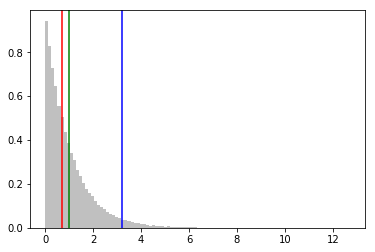

In [42]:
poblacion = np.random.exponential(size=100000)
plt.hist(poblacion,bins=100, color='silver',density=True)
plt.axvline(np.mean(poblacion),color='green')
plt.axvline(np.median(poblacion),color='red')
moda = collections.Counter(poblacion).most_common(1)[0][0]
plt.axvline(moda,color='blue')

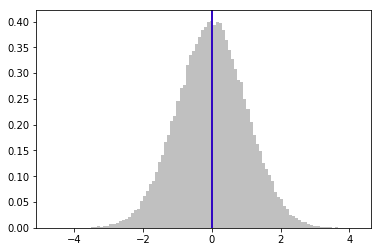

In [43]:
poblacion = np.random.normal(size=100000)
plt.hist(poblacion,bins=100, color='silver',density=True)
plt.axvline(np.mean(poblacion),color='green')
plt.axvline(np.median(poblacion),color='red')
moda = collections.Counter(poblacion).most_common(1)[0][0]
plt.axvline(moda,color='blue')

## Medidas de dispersión

La varianza de una muestra es el promedio de las distancias de los valores alrededor de la media... con algunos detallitos


$$ \sigma = \sqrt{\frac{\sum_{i=1}^n {(x_i - \bar{x})}^2}{n}} $$

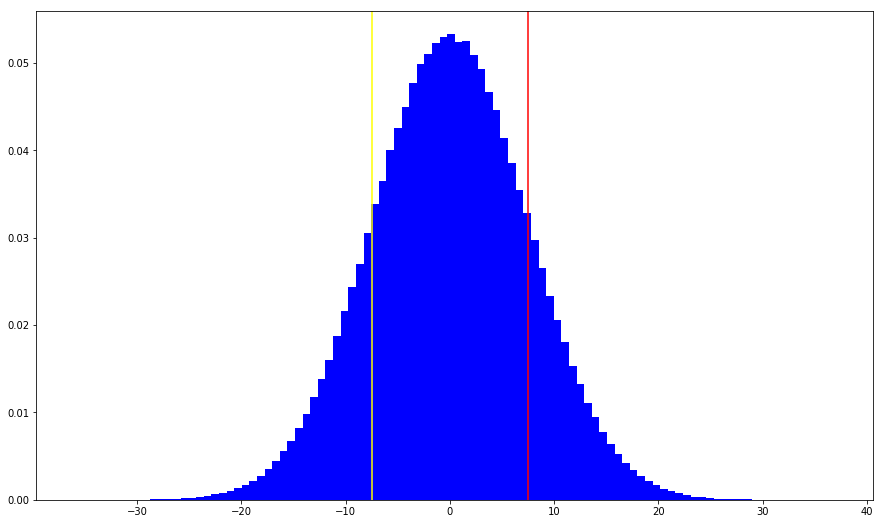

In [44]:
sigma = 7.5
poblacion = np.random.normal(0,sigma,size=1_000_000)
plt.figure(figsize=(15,9))
plt.hist(poblacion,bins=100,color='blue',density=True)
plt.axvline(sigma,color='red')
plt.axvline(-sigma,color='yellow')
plt.show()

In [45]:
poblacion = pd.Series([1,1,1,1,1,2,3,4,5,5,5,5,5,5])
muestra = pd.Series([1,2,3,4,5])

In [46]:
poblacion

0     1
1     1
2     1
3     1
4     1
5     2
6     3
7     4
8     5
9     5
10    5
11    5
12    5
13    5
dtype: int64

In [47]:
muestra

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [48]:
def desviacion_estandar(x):
    n = len(x)
    m = sum(x)/n
    return math.sqrt(sum((xi - m)**2 for xi in x)/n)

In [49]:
desviacion_estandar(poblacion)

1.8070158058105024

In [50]:
desviacion_estandar(muestra)

1.4142135623730951

In [51]:
def desviacion_estandar_muestra(x):
    n = len(x)
    m = sum(x)/n
    return (sum((xi - m)**2 for xi in x)/(n - 1))**(1/2)

In [52]:
desviacion_estandar_muestra(muestra)

1.5811388300841898

Lección para llevar en el corazón:** Para describir una distribución, lo mínimo aceptable es describirla como $\mu \pm \sigma$.

## Correlación

# INEGI

In [53]:
tabla = pd.read_csv('Datos/TR_PERSONA17.CSV', encoding='latin1')
tabla.head()

,ID_VIV,ID_PERSONA,ENT,NOM_ENT,MUN,NOM_MUN,LOC50K,NOM_LOC,COBERTURA,ESTRATO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,170010000001,17001000000101,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,170010000002,17001000000201,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-06,...,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN,1
2,170010000003,17001000000303,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,170010000003,17001000000301,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,170010000003,17001000000302,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN,2


In [54]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368976 entries, 0 to 368975
Data columns (total 86 columns):
ID_VIV                368976 non-null int64
ID_PERSONA            368976 non-null int64
ENT                   368976 non-null int64
NOM_ENT               368976 non-null object
MUN                   368976 non-null int64
NOM_MUN               368976 non-null object
LOC50K                368976 non-null int64
NOM_LOC               368976 non-null object
COBERTURA             368976 non-null int64
ESTRATO               368976 non-null object
UPM                   368976 non-null int64
FACTOR                368976 non-null int64
NUMPER                368976 non-null int64
SEXO                  368976 non-null int64
EDAD                  368976 non-null int64
PARENT                368976 non-null int64
PARENT_OTRO_C         368976 non-null int64
IDENT_MADRE           368976 non-null int64
IDENT_PADRE           368976 non-null int64
SERSALUD              368976 non-null int64
AFROD

In [55]:
tabla = tabla[['EDAD', 'INGTRMEN', 'ESCOACUM']]
tabla.head()

,EDAD,INGTRMEN,ESCOACUM
0,30,10000.0,16.0
1,71,NaN,6.0
2,2,NaN,NaN
3,23,4286.0,9.0
4,24,4286.0,6.0


In [56]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368976 entries, 0 to 368975
Data columns (total 3 columns):
EDAD        368976 non-null int64
INGTRMEN    141399 non-null float64
ESCOACUM    350144 non-null float64
dtypes: float64(2), int64(1)
memory usage: 8.4 MB


In [57]:
tabla['ESCOACUM'].describe()

count    350144.000000
mean          7.789138
std           8.010872
min           0.000000
25%           3.000000
50%           8.000000
75%          10.000000
max          99.000000
Name: ESCOACUM, dtype: float64

In [58]:
tabla = tabla.dropna()  # Quitar todos los renglones que contengan valores nulos
tabla = tabla[
    (tabla['EDAD'] < 90)
    & (tabla['INGTRMEN'] < 500_000)
    & (tabla['ESCOACUM'] < 90)
]

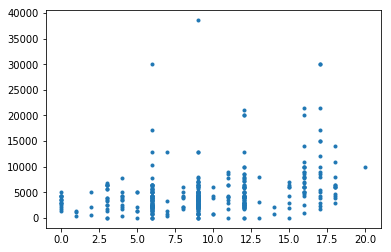

In [59]:
muestra = tabla.sample(400)
plt.plot(muestra['ESCOACUM'], muestra['INGTRMEN'], marker='.', linestyle='none')

- Covarianza: $$\mathrm{Cov}(x, y) = \frac{\sum_{i=1}^{n}(x_i - \bar{x}) \, (y_i - \bar{y})}{n}$$
- Coeficiente de correlación de Pearson:
$$r = \frac{ \mathrm{Cov}(x, y) }{ \sigma_{x} \, \sigma_{y} }$$

In [60]:
def pearson(x, y):
    n = len(x)
    assert n == len(y)
    media_x = sum(x)/n
    media_y = sum(y)/n
    covarianza = sum((x[i] - media_x)*(y[i] - media_y) for i in range(n))/n
    desviacion_x = (sum((x[i] - media_x)**2  for i in range(n))/n)**.5
    desviacion_y = (sum((y[i] - media_y)**2  for i in range(n))/n)**.5
    return covarianza/(desviacion_x*desviacion_y)

In [61]:
x = list(tabla['INGTRMEN'])
y = list(tabla['ESCOACUM'])
pearson(x, y)

0.3255209087442133

In [62]:
tabla.columns

Index(['EDAD', 'INGTRMEN', 'ESCOACUM'], dtype='object')

In [63]:
tabla = pd.read_csv('Datos/TR_PERSONA17.CSV', encoding='latin1')

In [64]:
numericas = (tabla.dtypes == np.dtype('float64')) | (tabla.dtypes == np.dtype('int64'))
columnas_numericas = [key for (key, value) in numericas.to_dict().items() if value]
tabla_num = tabla[columnas_numericas]
tabla_num.head()

,ID_VIV,ID_PERSONA,ENT,MUN,LOC50K,COBERTURA,UPM,FACTOR,NUMPER,SEXO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,170010000001,17001000000101,17,1,0,2,139186,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,170010000002,17001000000201,17,1,0,2,139224,2,1,3,...,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN,1
2,170010000003,17001000000303,17,1,0,2,139169,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,170010000003,17001000000301,17,1,0,2,139169,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,170010000003,17001000000302,17,1,0,2,139169,2,2,3,...,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN,2


In [65]:
# Porcentaje de NA por columna:
na_por_col = {columna: np.round(100*np.mean(tabla_num[columna].isnull())) for columna in tabla_num}
na_por_col

{'ID_VIV': 0.0,
 'ID_PERSONA': 0.0,
 'ENT': 0.0,
 'MUN': 0.0,
 'LOC50K': 0.0,
 'COBERTURA': 0.0,
 'UPM': 0.0,
 'FACTOR': 0.0,
 'NUMPER': 0.0,
 'SEXO': 0.0,
 'EDAD': 0.0,
 'PARENT': 0.0,
 'PARENT_OTRO_C': 0.0,
 'IDENT_MADRE': 0.0,
 'IDENT_PADRE': 0.0,
 'SERSALUD': 0.0,
 'AFRODES': 0.0,
 'ACTA_NAC': 0.0,
 'DHSERSAL1': 0.0,
 'DHSERSAL2': 98.0,
 'PERTE_INDIGENA': 0.0,
 'ENT_PAIS_NAC': 0.0,
 'NACIONALIDAD': 0.0,
 'HLENGUA': 5.0,
 'QDIALECT_C': 98.0,
 'QDIALECT_INALI': 98.0,
 'HESPANOL': 98.0,
 'ELENGUA': 7.0,
 'ASISTEN': 5.0,
 'MUN_ASI': 72.0,
 'ENT_PAIS_ASI': 72.0,
 'TIE_TRASLADO_ESCU': 72.0,
 'MED_TRASLADO_ESC1': 74.0,
 'MED_TRASLADO_ESC2': 99.0,
 'MED_TRASLADO_ESC3': 100.0,
 'ESCOLARI': 5.0,
 'NIVACAD': 5.0,
 'ALFABET': 9.0,
 'ESCOACUM': 5.0,
 'MUN_RES10': 10.0,
 'ENT_PAIS_RES10': 9.0,
 'SITUA_CONYUGAL': 21.0,
 'IDENT_PAREJA': 56.0,
 'CONACT': 21.0,
 'OCUPACION_C': 62.0,
 'SITUACION_TRAB': 62.0,
 'AGUINALDO': 74.0,
 'VACACIONES': 74.0,
 'SERVICIO_MEDICO': 74.0,
 'UTILIDADES': 74.0,
 'INC

In [66]:
columnas_seleccionadas = [nombre
                          for (nombre, porcentaje) in na_por_col.items()
                          if porcentaje <= 10]
(tabla[columnas_seleccionadas].dropna()).corr()

,ID_VIV,ID_PERSONA,ENT,MUN,LOC50K,COBERTURA,UPM,FACTOR,NUMPER,SEXO,...,HLENGUA,ELENGUA,ASISTEN,ESCOLARI,NIVACAD,ALFABET,ESCOACUM,MUN_RES10,ENT_PAIS_RES10,TAMLOC
ID_VIV,1.000000,1.000000,NaN,1.000000,-0.303399,NaN,0.997366,-0.174642,0.007856,-0.001505,...,-0.011330,-0.003980,-0.002560,0.000217,-0.015657,-0.003506,-0.013477,0.053232,-0.008587,-0.205253
ID_PERSONA,1.000000,1.000000,NaN,1.000000,-0.303399,NaN,0.997366,-0.174642,0.007856,-0.001505,...,-0.011330,-0.003980,-0.002560,0.000217,-0.015657,-0.003506,-0.013477,0.053232,-0.008587,-0.205253
ENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUN,1.000000,1.000000,NaN,1.000000,-0.303403,NaN,0.997366,-0.174646,0.007856,-0.001505,...,-0.011330,-0.003979,-0.002560,0.000217,-0.015657,-0.003505,-0.013478,0.053232,-0.008587,-0.205257
LOC50K,-0.303399,-0.303399,NaN,-0.303403,1.000000,NaN,-0.310004,0.503505,-0.017978,0.006181,...,-0.001748,-0.006623,-0.001855,-0.001253,0.054588,-0.034017,0.063322,-0.020823,-0.006728,0.851371
COBERTURA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UPM,0.997366,0.997366,NaN,0.997366,-0.310004,NaN,1.000000,-0.178565,0.007261,-0.001697,...,-0.011945,-0.004568,-0.002738,-0.000183,-0.015782,-0.003341,-0.013466,0.053270,-0.008896,-0.218260
FACTOR,-0.174642,-0.174642,NaN,-0.174646,0.503505,NaN,-0.178565,1.000000,-0.016681,0.008338,...,0.004829,0.000654,0.004122,-0.001006,0.045577,-0.024972,0.052100,-0.003450,-0.002287,0.475255
NUMPER,0.007856,0.007856,NaN,0.007856,-0.017978,NaN,0.007261,-0.016681,1.000000,0.061884,...,0.011837,0.016628,-0.501076,-0.008035,-0.025688,0.088047,-0.085397,0.028412,0.042140,-0.012261
SEXO,-0.001505,-0.001505,NaN,-0.001505,0.006181,NaN,-0.001697,0.008338,0.061884,1.000000,...,0.001554,0.002381,0.024660,-0.001532,0.006802,0.011175,0.005695,-0.000704,0.000010,0.008952


# NFL

In [67]:
df_nba = pd.read_csv('Kaggle/nba.csv')
df_nfl = pd.read_csv('Kaggle/nfl.csv')

In [68]:
df_nfl.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN


In [69]:
df_nba.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Chris Robinson,VAN,23.0,195.58,90.71840,Western Kentucky,USA,1996,2,...,4.6,1.7,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [70]:
df_nba = df_nba[['age','player_height','player_weight']]
df_nba.columns = ['edad', 'estatura', 'peso']
df_nba.head()

,edad,estatura,peso
0,23.0,195.58,90.71840
1,27.0,210.82,106.59412
2,30.0,208.28,106.59412
3,29.0,210.82,111.13004
4,22.0,205.74,106.59412


In [71]:
df_nfl = df_nfl[['Age', 'Height (inches)', 'Weight (lbs)']]
df_nfl.columns = ['edad', 'estatura', 'peso']
df_nfl['estatura'] = df_nfl['estatura']*2.54
df_nfl['peso'] = df_nfl['peso']*0.453592
df_nfl = df_nfl[df_nfl['edad'] < 80]
df_nfl.head()

,edad,estatura,peso
2,56.0,187.96,104.32616
3,30.0,185.42,115.66596
4,25.0,195.58,138.34556
7,22.0,195.58,113.39800
11,56.0,175.26,81.64656


In [72]:
df_nba.dropna(inplace=True)
df_nfl.dropna(inplace=True)

In [73]:
df_nba.corr()

,edad,estatura,peso
edad,1.000000,-0.016669,0.033497
estatura,-0.016669,1.000000,0.835145
peso,0.033497,0.835145,1.000000


In [74]:
df_nfl.corr()

,edad,estatura,peso
edad,1.000000,-0.021969,-0.200734
estatura,-0.021969,1.000000,0.699486
peso,-0.200734,0.699486,1.000000


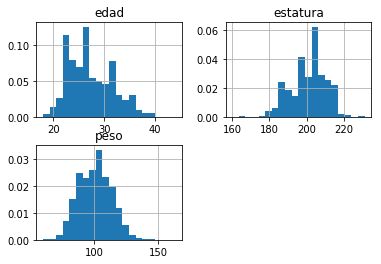

In [75]:
df_nba.hist(bins=20, density=True)
None

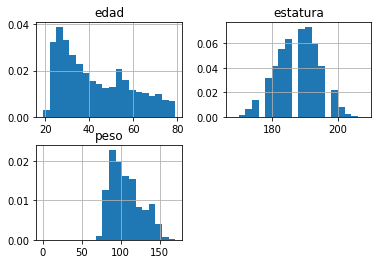

In [76]:
df_nfl.hist(bins=20, density=True)
None

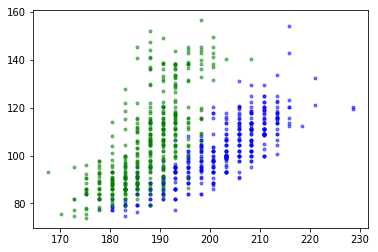

In [77]:
muestra_nba = df_nba.sample(400)
muestra_nfl = df_nfl.sample(400)
plt.plot(muestra_nba['estatura'], muestra_nba['peso'], '.', alpha=.5, color='blue')
plt.plot(muestra_nfl['estatura'], muestra_nfl['peso'], '.', alpha=.5, color='green')

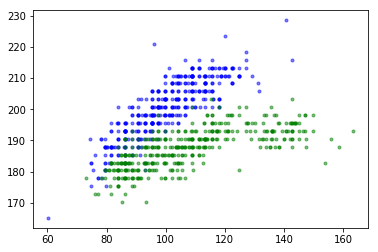

In [78]:
muestra_nba = df_nba.sample(400)
muestra_nfl = df_nfl.sample(400)
plt.plot(muestra_nba['peso'],muestra_nba['estatura'], '.', alpha=.5, color='blue')
plt.plot(muestra_nfl['peso'],muestra_nfl['estatura'], '.', alpha=.5, color='green')

Si r es el coeficiente de relación de Pearson , la r^2 (A veces escrita en mayuscula como R^2) es un valor entre 0 y 1 que nos indica el poder explicativo de una variable en terminos de la otra

In [79]:
0.835145**2

0.697467171025

# Reconciliación de datos

Los datos generalmente presentan muchos tipos de problemas:
- A veces faltan datos (NA) quizá por que los encuestados no respondieron algunas preguntas.
- Algunas ocasiones los datos están mal codificados, haciendo que, por ejeplo, una fecha aparezca en el lugar del peso de un jugador de la NFL
- Otras ocasiones los encuestadores tienen límites máximos respecto a los valores que pueden codificar, así, personas de más de 100 años se les pone 99.
- A veces en un conjunto de datos se usa el sistema métrico decimal y en otros el sistema inglés.

Arreglar estos problemas se le conoce como reconsiliación de datos o *limpieza de datos*.

## 1. Lenguajes y software para ciencia de datos
- [Python](https://youtu.be/fk8ATuMUltU). Es básicamente el estándar, y sigue ganando popularidad.
- [R](https://cran.r-project.org/). Fue el lenguaje dominante para hacer estadística hasta hace poco.
- [Microsoft Excel](https://products.office.com/es-MX/). Es el caballito de batalla para limpiar datos.

**Menciones honoríficas**
- [SAS](https://www.sas.com/es_mx/home.html). Líder en la industria de Analítica (según ellos). Es un software con su propio lenguaje de dominio.
- [SPSS](https://www.ibm.com/analytics/mx/es/technology/spss/index.html). Es una interfaz gráfica para usar métodos de estadística y aprendizaje automático.
- [Matlab](https://www.mathworks.com/products/matlab.html). Entorno de desarrollo para cómputo científico.
- [Mathematica](https://www.wolfram.com/mathematica/). Un sistema de álgebra computacional con esteroides. Hace de todo, pero no es específico de ciencia de datos.

## Tecnologías para almacenar datos
Se le da preferencia a las tecnologías opensource sobre los formatos propietarios.
- CSV. Significa valores separados por comas por sus siglas en inglés. Está regido por https://tools.ietf.org/html/rfc4180
- JSON. Es la manera en que se transportan estructuras de datos de JavaScript a través de Internet. Especificación: https://tools.ietf.org/html/rfc4627
- XML. Inspirado en HTML y popular en Java. Sumamente verbal. 
- SQLite. Es un sistema de base de datos de cero configuración, se usa en Android, aplicaciones de escritorio, y es recomendado como estándar por el gobierno de USA.

In [80]:
con = sqlite3.connect('Datos/ejemplo.db')

In [81]:
con.execute('DROP TABLE ejemplo')
con.execute('''
    CREATE TABLE ejemplo (
        campo1 INTEGER ,
        campo2 REAL,
        campo3 TEXT,
    PRIMARY KEY (campo1)) 
''')

In [82]:
tabla_aleatoria = pd.DataFrame({
    'campo1': range(1,101),
    'campo2': np.random.random(size=100),
    'campo3': 'Hola'
})

In [83]:
renglones = tabla_aleatoria.to_records(index=False)
renglones = [(int(a),float(b),str(c)) for (a,b,c) in renglones]

In [84]:
campo1 = range(1, 101)
campo2 = [random.random() for k in range(100)]
campo3 = ['Hola' for k in range(100)]

In [85]:
for renglon in zip(campo1, campo2, campo3):
    con.execute(
        '''
        INSERT INTO ejemplo
        VALUES (?, ?, ?)
        ''',
        renglon)
con.commit()

In [86]:
list(con.execute('SELECT * FROM ejemplo WHERE campo2 > 0.9'))

[(4, 0.9562311296767627, 'Hola'),
 (11, 0.9031442569314988, 'Hola'),
 (41, 0.9969206722005092, 'Hola'),
 (42, 0.9273098948855493, 'Hola'),
 (45, 0.9186162003398078, 'Hola'),
 (67, 0.947328159360771, 'Hola'),
 (78, 0.9818080005243937, 'Hola'),
 (85, 0.9133167720298105, 'Hola'),
 (86, 0.9194046941952848, 'Hola')]

## Detección de errores y artefactos en los datos

- **Errores**: datos que están permanentemente inaccesibles.
- **Artefactos**: datos que presentan problemas sistemáticos que surgen de del procesamiento, codificación, etc.

# Scores and rankings

- Score: Calificación numérica que se calcula a partir de varios atributos(columnas) a cada caso(renglón).
- Ranking: Ordenamiento de los casos(renglones) de acuerdo a algún criterio.

## Score
- Generalmente son combinaciones lineales de los atributos.

**Ejemplos**
- Calificaciones de cada persona en la universidad
- Calificaciones de Steam, que agrega la historia, la jugabulidad, los personajes, etc.
- Indice de masa corporal: $\frac{peso}{estatura_{}^2}$

In [87]:
nfl = pd.read_csv("Kaggle/nfl.csv")
nfl = nfl[['Height (inches)', 'Weight (lbs)']]
estatura=nfl['Height (inches)'].dropna()
peso = nfl['Weight (lbs)'].dropna()
nfl.columns = ['estatura', 'peso']
nfl['estatura'] = 2.54*nfl['estatura']/100
nfl['peso'] = nfl['peso']/2.205
nfl = nfl.dropna()
nfl.head()

,estatura,peso
0,1.8034,83.900227
1,1.7780,106.575964
2,1.8796,104.308390
3,1.8542,115.646259
4,1.9558,138.321995


In [88]:
nfl['imc'] = nfl['peso']/nfl['estatura']**2
nfl.head()

,estatura,peso,imc
0,1.8034,83.900227,25.797582
1,1.7780,106.575964,33.712872
2,1.8796,104.308390,29.524896
3,1.8542,115.646259,33.637091
4,1.9558,138.321995,36.161161


In [89]:
def categorizar(imc):
    if imc < 18.5:
        return 'Bajo de peso'
    if imc < 25:
        return 'Normal'
    if imc < 30:
        return 'Sobrepeso'
    return 'Obesidad'

In [90]:
nfl['status'] = nfl['imc'].map(categorizar)
nfl.head()

,estatura,peso,imc,status
0,1.8034,83.900227,25.797582,Sobrepeso
1,1.7780,106.575964,33.712872,Obesidad
2,1.8796,104.308390,29.524896,Sobrepeso
3,1.8542,115.646259,33.637091,Obesidad
4,1.9558,138.321995,36.161161,Obesidad


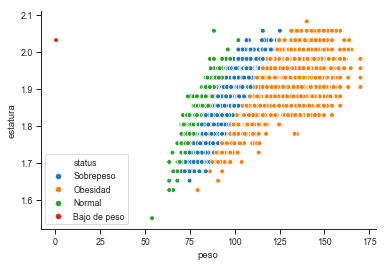

In [91]:
sns.set_style('ticks')
sns.set_context('paper')
sns.scatterplot(x='peso', y='estatura', hue='status', data=nfl)
sns.despine()

In [92]:
nba = pd.read_csv('Kaggle/nba.csv', index_col=0)
nba = nba[['player_height', 'player_weight']]
nba.columns = ['estatura', 'peso']
nba['estatura'] /= 100
nba['imc'] = nba['peso']/nba['estatura']**2
nba['status'] = nba['imc'].map(categorizar)
nba.head()

,estatura,peso,imc,status
0,1.9558,90.71840,23.716276,Normal
1,2.1082,106.59412,23.983338,Normal
2,2.0828,106.59412,24.571864,Normal
3,2.1082,111.13004,25.003906,Sobrepeso
4,2.0574,106.59412,25.182322,Sobrepeso


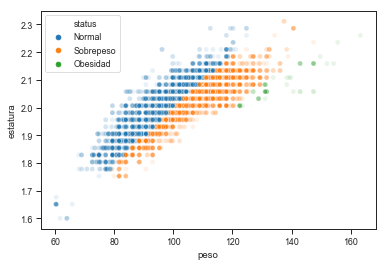

In [93]:
sns.scatterplot(x='peso', y='estatura', hue='status', alpha=0.1, data=nba)

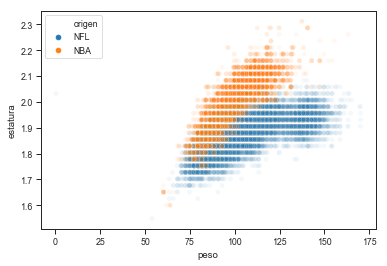

In [94]:
nfl['origen'] = 'NFL'
nba['origen'] = 'NBA'
sns.scatterplot(x='peso', y='estatura', hue='origen', alpha=0.05, data=pd.concat([nfl, nba]))

## Estándares y proxys

- Estándar dorado: aquellos datos que consideramos como verdad absoluta y tangible. En el caso del IMC se trata de la medición exacta de la grasa corporal
- Proxy (representante): son datos que aproximan una verdad, como medir qué tan importante es una persona por el número de enlaces en su página de Wikipedia.

## Scores vs. rankings

In [95]:
nfl['imc'].sort_values(ascending=False)

866      46.863283
935      46.168557
9753     46.103925
14133    46.103925
9287     45.968325
15042    45.638153
5890     44.988752
13863    44.929189
14794    44.929189
438      44.863783
861      44.849455
13321    44.747927
4903     44.460443
2323     44.287343
11599    44.287343
6485     44.057994
10760    44.030605
10803    43.934328
5112     43.926084
4320     43.812626
10789    43.739065
3611     43.739065
1056     43.739065
14025    43.645498
91       43.530353
7317     43.530353
11674    43.530353
4660     43.527529
14723    43.517129
14914    43.388760
           ...    
12150    22.373963
13165    22.373963
12723    22.373963
16965    22.373963
5441     22.373963
17025    22.336225
10110    22.311422
10645    22.311422
4278     22.311422
9896     22.311422
16283    22.238364
8090     22.236150
11401    22.236150
9244     22.147109
15378    22.032530
12426    21.967164
16942    21.967164
2399     21.952722
7828     21.923122
4514     21.893083
10654    21.891153
4913     21.

### Z-score
Es una forma de normalizar los datos de tal forma que la distribución tenga media 0 y desviación estandar 1 $$Z = \frac{X- \mu }{ \sigma }$$

In [96]:
def zscore(x):
    mu = sum(x)/len(x)
    std = (sum((x_i - mu)**2 for x_i in x)/(len(x) - 1))**0.5
    z = [(x_i - mu)/std for x_i in x]
    return z

In [97]:
stats.zscore(nfl['estatura'])

array([-0.97316872, -1.36109617,  0.19061363, ..., -0.58524127,
       -0.19731382, -0.19731382])

In [98]:
zscore(estatura[:5])

[-0.7302967433402214,
 -1.0954451150103321,
 0.3651483716701107,
 0.0,
 1.4605934866804429]

## Elo Rankings
La función *expit* es una función que transforma del intervalo $(-\infty, \infty)$ al $(0, 1)$. Se define por:
$$f_c(x) = \frac{1}{1 + \mathrm{e}^{-c\,x}}$$

Su inversa es *logit*

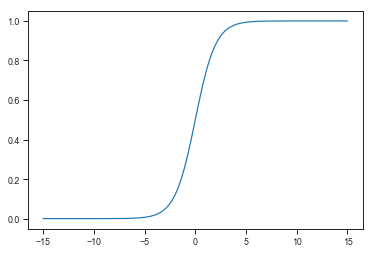

In [99]:
c=3
x = c*np.linspace(-5,5,num=100)
y = special.expit(x)
plt.plot(x,y)

In [100]:
partidos = pathlib.Path('Kaggle/data')

In [101]:
tablas=[]
for archivo in partidos.iterdir():
    if archivo.suffix!='.csv':continue
    tablas.append(pd.read_csv(archivo,parse_dates=['Date'],dayfirst=True))
df=pd.concat(tablas)
#df = df[['HomeTeam','AwayTeam','FTHG','FTAG']]
df =df.sort_values('Date')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2008-08-30,Espanol,Valladolid,1,0,H,0,0,D,10,...,2,1,18,17,1,9,3,5,0,0
1,2008-08-30,Valencia,Mallorca,3,0,H,2,0,H,17,...,6,2,17,14,5,6,4,0,0,0
2,2008-08-31,Ath Bilbao,Almeria,1,3,A,0,2,A,10,...,4,5,35,20,2,6,2,4,0,0
3,2008-08-31,Ath Madrid,Malaga,4,0,H,3,0,H,25,...,9,2,16,13,11,7,1,2,0,0
4,2008-08-31,Betis,Recreativo,0,1,A,0,1,A,8,...,2,6,17,18,2,2,3,1,0,0


In [102]:
df.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
227,2019-02-10,Sevilla,Eibar,2,2,D,0,1,A,13,...,4,4,11,7,9,7,4,2,1,0
228,2019-02-10,Valencia,Sociedad,0,0,D,0,0,D,10,...,4,1,11,18,7,5,2,4,0,0
225,2019-02-10,Ath Bilbao,Barcelona,0,0,D,0,0,D,13,...,5,2,23,10,6,4,4,2,1,0
226,2019-02-10,Leganes,Betis,3,0,H,2,0,H,16,...,4,1,22,11,4,4,4,2,0,1
229,2019-02-11,Alaves,Levante,2,0,H,1,0,H,16,...,4,0,14,18,3,10,3,2,0,0


In [103]:
def sgn(x):
    if x>0:
        return 1
    if x<0:
        return -1
    return 0

df['S'] = (df['FTHG']-df['FTAG']).map(sgn)
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,S
0,2008-08-30,Espanol,Valladolid,1,0,H,0,0,D,10,...,1,18,17,1,9,3,5,0,0,1
1,2008-08-30,Valencia,Mallorca,3,0,H,2,0,H,17,...,2,17,14,5,6,4,0,0,0,1
2,2008-08-31,Ath Bilbao,Almeria,1,3,A,0,2,A,10,...,5,35,20,2,6,2,4,0,0,-1
3,2008-08-31,Ath Madrid,Malaga,4,0,H,3,0,H,25,...,2,16,13,11,7,1,2,0,0,1
4,2008-08-31,Betis,Recreativo,0,1,A,0,1,A,8,...,6,17,18,2,2,3,1,0,0,-1


In [104]:
resultados=[]
for A,B,S in df[['HomeTeam','AwayTeam','S']].to_records(index=False):
    resultados.append((A,B,S))
resultados[:10] 

[('Espanol', 'Valladolid', 1),
 ('Valencia', 'Mallorca', 1),
 ('Ath Bilbao', 'Almeria', -1),
 ('Ath Madrid', 'Malaga', 1),
 ('Betis', 'Recreativo', -1),
 ('La Coruna', 'Real Madrid', 1),
 ('Numancia', 'Barcelona', 1),
 ('Osasuna', 'Villarreal', 0),
 ('Santander', 'Sevilla', 0),
 ('Sp Gijon', 'Getafe', -1)]

In [105]:
jugadores = set(df['HomeTeam']).union(df['AwayTeam'])

In [106]:
k=100
def actualizar_ranking(A,B,S):
    x=r[A]-r[B]
    p = special.expit(x)
    mu = 2*p - 1
    dA = k*(S - mu)
    dB = k*(mu - S)
    (r[A],r[B])= (r[A]+dA,r[B]+dB)

In [107]:
r_inicial, k = .0001,.1
r = dict.fromkeys(jugadores,r_inicial)
for (i,(A,B,S)) in df[['HomeTeam','AwayTeam','S']].iterrows():
    actualizar_ranking(A,B,S)
pd.Series(r).sort_values(ascending=False)

Barcelona      1.909447
Real Madrid    1.422541
Ath Madrid     1.334597
Valencia       0.784231
Sevilla        0.703199
Getafe         0.688665
Eibar          0.505431
Betis          0.460428
Alaves         0.455074
Sociedad       0.433289
Ath Bilbao     0.426534
Leganes        0.412890
Espanol        0.193192
Levante        0.149822
Villarreal     0.146868
Girona         0.015021
Celta         -0.019679
Vallecano     -0.025023
Elche         -0.072585
Valladolid    -0.107101
Huesca        -0.123621
Xerez         -0.220386
Mallorca      -0.234360
Sp Gijon      -0.292940
Tenerife      -0.374290
La Coruna     -0.400446
Almeria       -0.512219
Zaragoza      -0.536920
Hercules      -0.581023
Numancia      -0.634719
Osasuna       -0.681722
Malaga        -0.767550
Recreativo    -0.783872
Santander     -0.803425
Las Palmas    -0.900266
Granada       -0.924764
Cordoba       -1.040619
dtype: float64

## Uso de scores para ordenar(generar rankines) en Python

In [108]:
class A:
    def __repr__(self):
        return repr(self.__dict__)
    
a, b, c = A(), A(), A()
a.x, a.y = -1,1
b.x, b.y = 0, 0
c.x, c.y = 1,-1

sorted([a,b,c],key=lambda obj: obj.x+obj.y)

[{'x': -1, 'y': 1}, {'x': 0, 'y': 0}, {'x': 1, 'y': -1}]

In [109]:
d = {'a':3,'b':8,'c':-1}
sorted(d.keys(),key=d.get)

['c', 'a', 'b']

In [115]:
def borda(rankings,pesos):
    assert isinstance(rankings,list)
    assert len(rankings)>1
    assert all(isinstance(ranking,list) for ranking in rankings)
    assert all(isinstance(peso,(int,float)) for peso in pesos)
    elementos = set(rankings[0])
    assert all((elementos==set(ranking)) for ranking in rankings)

    mezcla = dict.fromkeys(rankings[0],0)
    for ranking in rankings:
        for (elemento,peso) in zip(ranking,pesos):
            mezcla[elemento] += peso
    return mezcla

In [111]:
def borda(rankings, pesos=None):
    if pesos is None:
        cuantiles = np.linspace(0, 1, num=len(rankings[0]) + 2)[1:-1]
        pesos = list(stats.norm(0, 1).ppf(cuantiles))
    
    mezcla = dict.fromkeys(rankings[0], 0)
    for ranking in rankings:
        for (elemento, peso) in zip(ranking, pesos):
            mezcla[elemento] += peso
    return sorted(mezcla.keys(), key=mezcla.get)

In [112]:
pesos = [1, 2, 3, 4, 5]
entrada = [['A','C','B','D','E'],['B','A','C','D','E'],['A','B','C','E','D'],['A','B','D','C','E']]
score = borda(entrada,pesos)
score

['A', 'B', 'C', 'D', 'E']

[0.02439024 0.04878049 0.07317073 0.09756098 0.12195122 0.14634146
 0.17073171 0.19512195 0.2195122  0.24390244 0.26829268 0.29268293
 0.31707317 0.34146341 0.36585366 0.3902439  0.41463415 0.43902439
 0.46341463 0.48780488 0.51219512 0.53658537 0.56097561 0.58536585
 0.6097561  0.63414634 0.65853659 0.68292683 0.70731707 0.73170732
 0.75609756 0.7804878  0.80487805 0.82926829 0.85365854 0.87804878
 0.90243902 0.92682927 0.95121951 0.97560976]


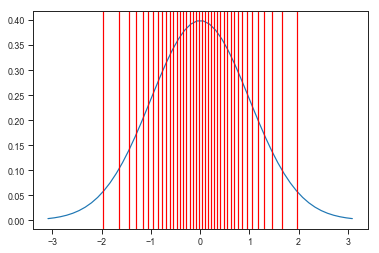

In [113]:
elementos = 40
N = stats.norm(0, 1)
p = np.linspace(0, 1, num=(elementos + 2))[1:-1]
print(p)
x = N.ppf(p)
y = N.pdf(x)

# Graficar gaussiana
a, b = N.ppf([0.001, 0.999])
x_grafica = np.linspace(a, b)
y_grafica = N.pdf(x_grafica)
plt.plot(x_grafica, y_grafica)
for xi in x:
    plt.axvline(xi, color='red')

In [116]:
normal = stats.norm(0,1)
cuantiles = np.linspace(0,1,num=len(entrada[0])+2)[1:-1]
pesos = stats.norm(0,1).ppf(cuantiles)
print('Pesos',*map('{:.2f}'.format,pesos))
score = borda(entrada,pesos)
sorted(score.keys(),key=score.get)

Pesos -0.97 -0.43 0.00 0.43 0.97


['A', 'B', 'C', 'D', 'E']

## Metodos de ranking basados en grafos

Un grafo dirigido representa los votos de qué elementos van antes que otros en un ranking. Específicamente, la arista $(u, v)$ representa que hay una restricción para que $u$ preceda a $v$ en el ranking.

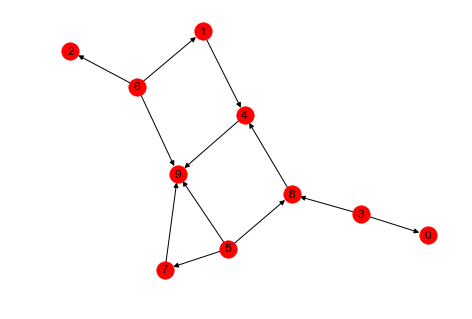

In [117]:
G = nx.gnm_random_graph(10, 12)
H = nx.DiGraph()
H.add_nodes_from(G.nodes)
for u, v in G.edges:
    if np.random.randint(0, 2) == 1:
        H.add_edge(u, v)
    else:
        H.add_edge(v, u)

pos = nx.kamada_kawai_layout(G)
nx.draw(H, pos, with_labels=True)

In [118]:
pos

{0: array([ 1.        , -0.26853516]),
 1: array([-0.14235438,  0.47960152]),
 2: array([-0.81294496,  0.40702121]),
 3: array([ 0.66246391, -0.19108191]),
 4: array([0.07177296, 0.17108022]),
 5: array([-0.01255952, -0.318201  ]),
 6: array([-0.47513751,  0.27714205]),
 7: array([-0.33311084, -0.39480347]),
 8: array([ 0.3098338, -0.1188923]),
 9: array([-0.26796345, -0.04333115])}

In [119]:
tiempo = iter(itertools.count())

In [120]:
def profundidad(G):
    def visitar(u):
        pre[u] = next(tiempo)
        for v in G.neighbors(u):
            if v in pre: continue
            visitar(v)
        post[u] = next(tiempo)
    
    tiempo = itertools.count()
    pre, post = {}, {}
    
    for r in G.nodes:
        if r in pre: continue
        visitar(r)
            
    return pre,post

,pre,post
0,0,9
1,10,13
2,11,12
3,3,8
4,14,15
5,16,17
6,1,2
7,4,7
8,18,19
9,5,6


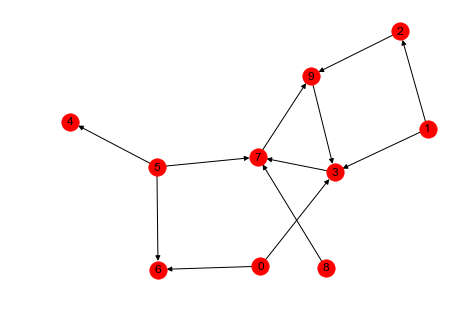

In [121]:
G = nx.gnm_random_graph(10, 12)
H = nx.DiGraph()
H.add_nodes_from(G.nodes)
for u,v in G.edges:
    H.add_node(u)
    if np.random.randint(0,2) == 1:
        H.add_edge(u,v)
    else:
        H.add_edge(v,u)

pre,post = profundidad(H)
pos = nx.kamada_kawai_layout(G)
nx.draw(H, pos, with_labels=True)
pd.DataFrame({'pre': pre,'post':post})

,pre,post
0,0,9
1,10,13
2,11,12
3,3,8
4,14,15
5,16,17
6,1,2
7,4,7
8,18,19
9,5,6


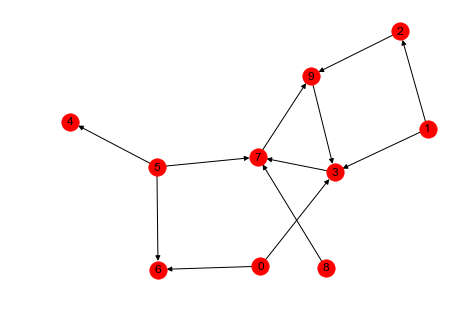

In [122]:
nx.draw(H, pos, with_labels=True)
pre, post = profundidad(H)
pd.DataFrame({'pre': pre, 'post': post})

In [123]:
parentesis = [None]*(len(G.nodes)*2)
for u, t in pre.items():
    parentesis[t] = f'({u}'
for u, t in post.items():
    parentesis[t] = f'{u})'
print(*parentesis)

(0 (6 6) (3 (7 (9 9) 7) 3) 0) (1 (2 2) 1) (4 4) (5 5) (8 8)


In [124]:
def toposort(G):
    pre, post = profundidad(G)
    return sorted(post, key=post.get)

toposort(H)

[6, 9, 7, 3, 0, 2, 1, 4, 5, 8]

## El teorema de imposibilidad de Arrow
Denotamos con $A < B$ que el candidato $A$ es preferible a $B$. Un sistema de votación ideal tendría las siguientes características:
- **Completez**: Dados dos candidatos $A$ y $B$, el sistema debe decir si $A < B$, $B < A$ ó $A = B$.
- **Transitividad**: Si $A < B$ y  $B < C$ entonces $A < C$.
- Si todo individuo prefiere $A$ sobre $B$, entonces el sistema rankea $A < B$.
- El sistema no debe de depender sólo de una persona (un dictador).
- La preferencia de $A$ comparada con $B$ debería ser independiente de las demás alternativas como $C$.

El teorema de la imposibilidad de Arrow establece que tal sistema no existe.

Votante | Rojo | Verde | Azul
--------|------|-------|------
**x**   |   1  |   2   |  3
**y**   |   2  |   3   |  1
**z**   |   3  |   1   |  2

En esta tabla observamos en cada renglón un ordenamiento de los candidatos **Rojo**, **Verde** y **Azul**.
- **Rojo** < **Verde** por mayoría de votos (**x**  y __y__).
- **Verde** < **Azul** por mayoría de votos (**x**  y __z__).
- Pero **Azul** < **Rojo** según los votos de la mayoría (**y** y __z__)

# Análisis estadístico

## Introducción a las pruebas de hipótesis
Supongamos que se nos da una moneda y al tirarla 30 veces obtenemos 22 soles y 8 águilas. ¿La moneda es justa?
- *Hipótesis nula*: El resultado observado se debe al azar.
- *Hipótesis alternativa*: La negación de la hipótesis nula.

La probabilidad de obtener $k$ soles en $n$ volados donde la probabilidad de obtener sol en un volado es $p$, está dada por:
$$\mathrm{P}(X=k)=\binom{n}{k} \, p^k \, (1 - p)^{n - k}$$

*Demostración*. Una sucesión de $n$ volades se puede representar como una sucesión de letras $A$/$S$ (águila o sol). Por ejemplo,
$$ASAASSASAAA$$
- Si en $n$ volados ocurre $k$ veces sol, es equivalente a seleccionar $k$ símbolos de la sucesión y rellenarlos con $S$ y el resto con $A$. Esto se puede hacer en $\binom{n}{k}$ formas distintas.
- La probabilidad de cada sucesión de $k$ soles en $n$ volados es la probabilidad de obtener $k$ soles y $n -k$ águilas; es decir $p^k\,(1- p)^{n - k}$.

Por lo tanto la probabilidad total de obtener $k$ soles (en cualquier orden) en $n$ volados es $\binom{n}{k} \, p^k \, (1 - p)^{n - k}$. $\blacksquare$

In [125]:
n, r = (20, 7)
L = list(range(n, n - r, -1))
assert len(L) == r
assert L[0] == n
assert L[-1] == n - r + 1

In [126]:
def permutaciones_sin_repeticion(n, r):
    accum = 1
    for x in range(n, n - r, -1):
        accum *= x
    return accum

def factorial(n):
    accum = 1
    for x in range(2, n + 1):
        accum *= x
    return accum

def combinaciones(n, k):
    return permutaciones_sin_repeticion(n, k)//factorial(k)

def probabilidad(n, k, p):
    return combinaciones(n, k) * p**k * (1 - p)**(n - k)

In [127]:
import fractions
P = probabilidad(30, 22, fractions.Fraction(1/2))
print('La probabilidad de 22 soles en 30 volados es', P,', o aprox.', float(P))

La probabilidad de 22 soles en 30 volados es 5852925/1073741824 , o aprox. 0.0054509611800313


In [128]:
n, p = (30, 1/2)
df = pd.DataFrame({
    'Cantidad de soles': list(range(31)),
    'Probabilidad': [probabilidad(n, k, p) for k in range(31)]})
df.head()

,Cantidad de soles,Probabilidad
0,0,9.313226e-10
1,1,2.793968e-08
2,2,4.051253e-07
3,3,3.781170e-06
4,4,2.552290e-05


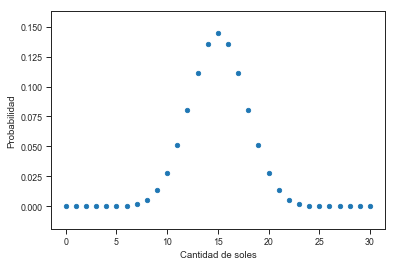

In [129]:
df.plot(x='Cantidad de soles', y='Probabilidad', kind='scatter')

Probabilidad de ver entre 9 y 21 soles en 30 volados:

In [130]:
df[(df['Cantidad de soles'] >= 9) & (df['Cantidad de soles'] <= 21)]['Probabilidad'].sum()

0.983875198289752

Probabilidad de NO ver entre 9 y 21 volados:

In [131]:
1 - _

0.016124801710247993

La probabilidad de observar estos datos con la hipótesis nula $H_0$ se le llama el **p-valor**.
- Rechazamos la hipótesis nula cuando el $p$-valor es muy pequeño.
- No rechazamos la hipótesis nula cuando el $p$-valor está sobre cierto umbral.

Prueba de hipótesis| Aceptar $H_0$ | Rechazar $H_0$
-------------------|---------------|---------------
$H_0$ es verdadera |     ✓         | Error tipo I (falso positivo)
$H_0$ es falsa     | Error tipo II (falso negativo) | ✓

<img src="https://effectsizefaq.files.wordpress.com/2010/05/type-i-and-type-ii-errors.jpg" alt="Errores de prueba de hipótesis" width="50%"/>

In [132]:
@numba.jit
def calcular_p(n, p, repeticiones=1_000_000):
    M = 0
    for i in range(repeticiones):
        k = np.sum(np.random.random(size=n) < p)
        M += int((k > 21) or (k < 8))
    return M / repeticiones

In [133]:
calcular_p(30, 0.5)

0.011033

In [134]:
calcular_p(30, 0.5)

0.010737

In [135]:
X = [1.1, 3.0, 2.8, 1.9, 2.5, 2.6]
Y = [8.1, 3.5, 5.4, 2.4, 3.0, 4.1]

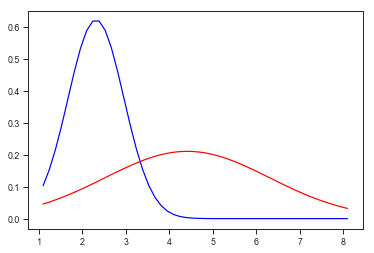

In [136]:
def comparar_normales(X, Y):
    N_1 = stats.norm(np.mean(X), np.std(X))
    N_2 = stats.norm(np.mean(Y), np.std(Y))

    a, b = min(itertools.chain(X, Y)), max(itertools.chain(X, Y))
    dominio = np.linspace(a, b)
    plt.plot(dominio, N_1.pdf(dominio), color='blue')
    plt.plot(dominio, N_2.pdf(dominio), color='red')
comparar_normales(X, Y)

# Podemos comparar el area bajo la curva que tienen en común y la que no tienen en común, dado que es menor, las muestras son de distintas poblaciones

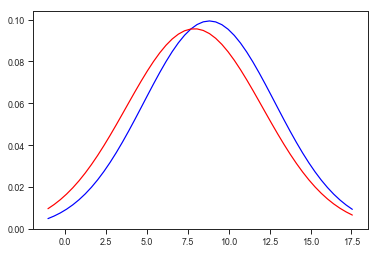

In [137]:
X = np.random.normal(loc=8, scale=4, size=30)
Y = np.random.normal(loc=8, scale=4, size=40)
comparar_normales(X, Y)

In [138]:
X

array([ 7.87107816,  9.14565901, 13.66428225, 10.80299933,  7.38232874,
        5.81521108, 15.32602988,  6.14871712,  9.41576069,  7.65883064,
       16.94873182,  1.83758267, 10.08288364, 14.53795048,  8.07343251,
        7.17002412, 13.39435423,  8.02606188, 13.42831422,  9.46140719,
        1.15477379, 13.48017222,  7.93171582,  9.62863026,  9.7085961 ,
        5.90426893,  5.63553964,  0.27547812, 10.24764526,  4.21863626])

In [139]:
Y

array([12.92449804,  9.73883129, 17.55389678, 11.81910351, 10.23846995,
        7.68777717,  1.10285379,  8.74589818,  1.71309541,  3.39243642,
        9.91018476,  9.81940253,  1.12847172,  8.7772039 ,  7.62409032,
        9.46428095,  8.30549292,  9.93162481, 12.21940039,  6.55711111,
       16.3420036 ,  9.13550195,  6.87244151, -1.05323235, 12.82381864,
        6.25400657,  4.67857251,  7.23039393,  7.79562046,  2.11098784,
       10.46949614,  2.43710755,  8.24973282, 13.26166558,  2.7700005 ,
       13.23225768,  4.8637983 ,  4.47157321,  7.43520415,  7.73627038])

In [ ]:
np.mean(X) - np.mean(Y)

0.9182862471825581

In [ ]:
@numba.jit
def prueba_diferencia_medias(X, Y, repeticiones=1_000_000):
    Z = np.concatenate([X, Y])
    diferencia_obs = np.mean(X) - np.mean(Y)
    diferencias = []
    for i in range(repeticiones):
        np.random.shuffle(Z)
        X_simulado = Z[:len(X)]
        Y_simulado = Z[len(X):]
        diferencias.append(np.mean(X_simulado) - np.mean(Y_simulado))
    plt.hist(diferencias, bins=30)
    plt.axvline(diferencia_obs, color='red')
    return np.sum(np.abs(np.array(diferencias)) >= abs(diferencia_obs))/repeticiones

In [ ]:
prueba_diferencia_medias(X, Y)

### Si está pegada la diferencia real de la simulada las muestras pertenecen a la misma población.

## Intervalos de confianza para la media

In [ ]:
N = np.random.randint(1, 50, size=20)
xbar = [None]*10000
for i in range(10000):
    sample = N[np.random.randint(len(N), size=len(N))]
    xbar[i] = np.mean(sample)

plt.hist(xbar, bins=30)

In [ ]:
conf = 95
a = (100 - conf)/2
b = 100 - a
np.percentile(xbar, [a, b])

In [ ]:
np.mean(N)

In [ ]:
def bootstrap_remplazo(N, repeticiones= 100_000):
    
    print("N: ", N)
    xbar= np.zeros(repeticiones)
    media_Real= np.mean(N)
    print("Media Real: ", media_Real)
    
    for i in range(repeticiones):
        sample= N[np.random.randint(len(N), size= len(N))]
        xbar[i]= np.mean(sample)
 
    results= np.mean(xbar)
    print("Media de las medias: ", results)
    
    desviacion_std= np.std(xbar)
    print("Desviación estándar de medias: ", desviacion_std)

    #Graficamos
    plt.hist(xbar, 50, facecolor='green')   
    plt.axvline(media_Real, color= "red" )
#     plt.axvline(results, color= "black" )
    
    plt.xlabel('Medias')
    plt.ylabel('Cantidad')
    plt.title(f'Histograma de Medias')

    return results, desviacion_std

In [ ]:
#Creamos los datos
max= 50
min= 1
N= np.random.randint(min, max, size= 20) #enteros positivos porque son turtugas! xD

#LLamamos a la función
results, desviacion_std= bootstrap_remplazo(N)

In [ ]:
def bootstrap_remplazo(N, repeticiones= 100_000):
    
    print("N: ", N)
    xbar= np.zeros(repeticiones)
    media_Real= np.mean(N)
    print("Media Real: ", media_Real)
    
    for i in range(repeticiones):
        sample= N[np.random.randint(len(N), size= len(N))]
        xbar[i]= np.mean(sample)
 
    results= np.mean(xbar)
    print("Media de las medias: ", results)
    
    desviacion_std= np.std(xbar)
    print("Desviación estándar de medias: ", desviacion_std)
    
    confianza= 95
    a= (100- confianza)/2
    b= 100 - a
    percentil= np.percentile(xbar, [a, b])
        
    print("El valor de la media poblacional con un ", confianza, "% de seguridad está entre: ", percentil)
    
    return results, desviacion_std

In [ ]:
#Creamos los datos
max= 50
min= 1
N= np.random.randint(min, max, size= 20) #enteros positivos porque son turtugas! xD

#LLamamos a la función
results, desviacion_std= bootstrap_remplazo(N)

# Visualización de datos

In [ ]:
df = pd.read_csv("Kaggle/mexican_medical_students_mental_health_data.csv")
df.head()

In [ ]:
df[['height','weight']].plot(x='weight')

# ANSCOMBE

In [ ]:
anscombe = pd.read_csv("Kaggle/anscombe.csv")

In [ ]:
anscombe.describe()

In [ ]:
anscombe[['x1','y1']].corr()

In [ ]:
sns.regplot(x='x1',y='y1',data=anscombe)

In [ ]:
fig, ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(10,10))
sns.regplot(x='x1',y='y1',data=anscombe,ax=ax[0,0])
sns.regplot(x='x2',y='y2',data=anscombe,ax=ax[1,0])
sns.regplot(x='x3',y='y3',data=anscombe,ax=ax[0,1])
sns.regplot(x='x4',y='y4',data=anscombe,ax=ax[1,1])

## Valores esteticos de la visualización de datos

- **Maximizar la razón de datos sobre la tinta**
- **MInimizar el factor mentira**

## Análisis exploratorio de datos

# NHANES

In [ ]:
df = pd.read_csv("Kaggle/nhanes.csv")
df.head()

In [ ]:
np.sum(df['Gender'] == 1)

In [ ]:
np.sum(df['Gender'] == 0)

In [ ]:
df['Gender'] = df['Gender'].map({0: 'female',1:'male'}).astype('category')
df.head()

In [ ]:
df['Gender'].describe()

In [ ]:
df['Gender'].value_counts()

In [ ]:
df['Age'] = df['Age']/12
df.head()

In [ ]:
sns.distplot(df['Age'])

In [ ]:
sns.distplot(df['Age'], kde=False)
sns.despine()

In [ ]:
df['Height'].describe()

In [ ]:
sns.distplot(df['Height'], kde=False, bins=30)
sns.despine()

In [ ]:
df.corr()

In [ ]:
sns.pairplot(df)

In [ ]:
sns.pairplot(df, hue='Gender' )

In [ ]:
df.loc[df['Arm_circum'].idxmax()]

In [ ]:
df['Arm_circum'].max()

In [ ]:
df.dropna(inplace=True)

In [ ]:
sns.pairplot(df,hue='Gender')

In [ ]:
sns.pairplot(df, hue='Gender', plot_kws={'alpha':0.01})

In [ ]:
df.describe()

In [ ]:
df.loc[df['Arm_circum'].idxmax()]

In [ ]:
df.corr()

## Analisis Lego

In [ ]:
sets_df = pd.read_csv("Kaggle/Lego/sets.csv")
sets_df.head()

In [ ]:
sets_df['theme_id'] = sets_df['theme_id'].astype('category')

In [ ]:
sets_df.describe()

In [ ]:
sets_df.loc[sets_df['num_parts'].idxmin()]

In [ ]:
themes_df = pd.read_csv("Kaggle/Lego/themes.csv")
themes_df.head()

In [ ]:
themes_df['id'] = themes_df['id'].astype('category')

In [ ]:
pd.merge(sets_df,themes_df,left_on='theme_id',right_on='id')

In [ ]:
pd.merge(sets_df,themes_df,left_on='theme_id',right_on='id',suffixes=('_set','_theme'))

In [ ]:
df = pd.merge(sets_df,themes_df,left_on='theme_id',right_on='id',suffixes=('_set','_theme'))[['name_set','year','num_parts','name_theme']]
df.head()

In [ ]:
df['name_theme'] = df['name_theme'].astype(str)
#df['num_parts'] = df[df['num_parts']>15]
plt.pie(df['num_parts'],labels=df['name_theme'])
plt.show()

In [ ]:
df.groupby('year')['num_parts'].mean()

In [ ]:
df.groupby('year')['num_parts'].mean().plot()
plt.ylabel('num_parts')
sns.despine()

In [ ]:
serie_df = pd.DataFrame({'mean':df.groupby('year')['num_parts'].mean()
, 'std': df.groupby('year')['num_parts'].std()})
serie_df.head()

In [ ]:
serie_df['mean_low'] = serie_df['mean'] - serie_df['std']
serie_df['mean_up'] = serie_df['mean'] + serie_df['std']

In [ ]:
serie_df['mean'].plot()
plt.fill_between(x=serie_df.index,y1=serie_df['mean_low'],y2=serie_df['mean_up'],color='silver')
serie_df['mean'].plot

In [ ]:
serie_df = df.groupby('year').describe()['num_parts']
serie_df.head()

In [ ]:
plt.fill_between(x=serie_df.index,y1=serie_df['25%'],y2=serie_df['75%'],color='silver')
#plt.plot(serie_df.index,serie_df['mean'],color='red')
plt.plot(serie_df.index,serie_df['50%'],color='red')
sns.despine()

In [ ]:
df_parts = pd.read_csv("Kaggle/Lego/parts.csv")
df_parts_categories = pd.read_csv("Kaggle/Lego/part_categories.csv")

In [ ]:
df = pd.merge(df_parts,df_parts_categories,left_on = 'part_cat_id',right_on='id',suffixes=('_part','_category'))
df.head()

In [ ]:
df['name_category'].describe()

In [ ]:
frecuencias = (df['name_category'].value_counts().to_frame().reset_index())
frecuencias.columns =['name','freq']

In [ ]:
frecuencias.head()

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6,11))
sns.barplot(x='freq',y='name',data=frecuencias,ax=ax)

## Analisis de Iris

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df['species'].value_counts()

In [ ]:
tablas = dict(iter(df.groupby('species')))
tablas.keys()

In [ ]:
tablas['setosa'].head()

In [ ]:
tablas['setosa'].describe()

In [ ]:
tablas['virginica'].head()

In [ ]:
tablas['virginica'].describe()

In [ ]:
tablas['versicolor'].head()

In [ ]:
tablas['virginica'].describe()

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
sns.boxplot(x='species',y='petal_length',data=df)

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
sns.violinplot(x='species',y='petal_length',data=df)

In [ ]:
sns.pairplot(data=df,hue='species')

## Analisis de vuelos

In [ ]:
flights = sns.load_dataset("flights")
flights.head()

In [ ]:
flights.describe()

In [ ]:
flights = flights.pivot("month","year","passengers")

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(flights,ax=ax,cmap='bwr')

## Gapminder

In [ ]:
pop_df = pd.read_csv('Kaggle\Gapminder\population_total.csv',index_col='country')
pop_df.head()

In [ ]:
health_df = pd.read_csv('Kaggle\Gapminder\life_expectancy_years.csv',index_col='country')
health_df.head()

In [ ]:
gdp_df = pd.read_csv('Kaggle\Gapminder\gdppercapita_us_inflation_adjusted.csv',index_col='country')
gdp_df.head()

In [ ]:
regions_df = pd.read_excel(
    'Kaggle\Gapminder\Data Geographies - v1 - by Gapminder.xlsx',
    sheet_name=1)
regions_df = regions_df[['name','four_regions']].set_index('name')
regions_df.head()

In [ ]:
df = pd.DataFrame(
    {
    'poblacion':pop_df['2017'],
    'salud':health_df['2017'],
    'PIB':gdp_df['2017'],
    'Region':regions_df['four_regions']
})
df.head()

In [ ]:
df.to_csv("Gapminder 2017.csv")

In [ ]:
sns.scatterplot(x='PIB',y='salud',data=df)

In [ ]:
sns.set_style('white')
sns.scatterplot(y='PIB',x='salud',data=df)

In [ ]:
df = pd.DataFrame(
    {
    'poblacion':pop_df['2017'],
    'salud':health_df['2017'],
    'PIB':gdp_df['2017'],
    'Region':regions_df['four_regions']
})
df.head()

In [ ]:
sns.set_context('talk')
sns.set_style('white')
fig,ax = plt.subplots(figsize=(16,10))
sns.scatterplot(
    x='PIB',
    y='salud',
    hue='Region',
    size='poblacion',
    sizes=(200,500),
    data=df)
ax.set_xscale('log')
for pais, datos_pais in df.dropna().iterrows():
    ax.text(datos_pais['PIB'],datos_pais['salud'],pais,fontsize=8)
sns.despine()
plt.savefig('gapminder_clon.svg')

In [ ]:
df['poblacion'].describe()

In [ ]:
sns.distplot(df['poblacion'],bins=30, norm_hist=False)

In [ ]:
p = sns.lmplot(
    x='PIB',
    y='salud',
    hue='Region',
    data=df
 )

In [ ]:
from bokeh.models import HoverTool,ColumnDataSource

TOOLTIPS=[
            ("country", "${country}"),
            ("(PIB,salud)", "($PIB, $salud)"),
            ("poblacion", "@poblacion")
        ]

p = figure(plot_width=1000, plot_height=1000,x_axis_type='log',y_axis_type='log',tooltips=TOOLTIPS)

for _, row in df.iterrows():
    p.scatter('PIB','salud',source=df,size='poblacion')

sns.despine()

show(p)

In [ ]:
?ax.text()

# Modelos

## Navaja de Ockham
    - La explicación más simple es la más probable
    - Menor cantidad  de supuestos
    - Menor cantidad de parámetros
    - Principio  estético

## Taxonomía de modelos 
    - Caja negra(redes) vs modelo descriptivo(arbol de decisión)
    - Modelos de principio(Agente humano,tenga sentido,sea interpretable) vs orientados a datos
    - Estocasticos vs deterministas
    - lineal vs no lineal

# Modelos base(baseline)

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df.head()

In [ ]:
sns.pairplot(iris_df,hue='species')

In [ ]:
iris_df['species'].value_counts()

In [ ]:
def modelo_chango(instancia):
    return random.choice(['setosa','virginica','versicolor'])

In [ ]:
instancias = iris_df.drop(columns=['species'])
iris_df['predichas']=[
    modelo_chango(instancia)
    for instancia in instancias.iterrows()
]
iris_df.head()

In [ ]:
100*np.mean(iris_df['species'] == iris_df['predichas'])

In [ ]:
def modelo_a_ojo(instancia):
    petal_length = instancia['petal_length']
    if petal_length <= 2.5:
        return 'setosa'
    elif petal_length <= 4.6:
        return 'versicolor'
    elif petal_length <= 7:
        return 'virginica'
    else:
        return 'No existe la planta'

In [ ]:
iris_df['predichas'] = [
    modelo_a_ojo(renglon)
    for indice,renglon in instancias.iterrows()
]
iris_df.head()

In [ ]:
100*np.mean(iris_df['species'] == iris_df['predichas'])

In [ ]:
iris_df.describe()